## IMAGE CLASSIFICATION USING CIFAR-10 DATASET: A COMPARISON OF MANHATTAN (L1) AND EUCLIDEAN (L2) DISTANCES WITH 5-FOLD CROSS-VALIDATION
***
#### **Name:** Foysal Ahamed Nirob
#### **Id:** 19-40925-2
#### **Section:** CVPR [C]







 # **Introduction:**

This assignment explores the classification of images using the CIFAR-10 dataset. The dataset consists of 60,000 32x32x3 color images in 10 categories. Catagories are: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. The objective is to create an image classification model and compare the Manhattan (L1) and Euclidean (L2) distance calculation methods. The model's performance will be evaluated using 5-fold cross-validation. The training data, consisting of 50,000 images, will be transformed into grayscale (32x32) to optimize computational efficiency. Additionally, a graphical representation will be generated to visualize the accuracy of different hyperparameter values (K) or number of neighbors for both distance calculation techniques. Additionally, the discussion will focus on determining the more suitable distance calculation method for this dataset, and the top 5 predictions made by the model will be presented.


## **Dataset and Preprocessing:**

We will be working with the CIFAR-10 dataset, which is widely used for image classification tasks. The CIFAR-10 dataset consists of 60,000 32x32x3 color images in ten different categories or classes.

To begin, you can download the CIFAR-10 dataset from the following link: __[CIFAR-10 Dataset](https://github.com/YoongiKim/CIFAR-10-images)__

Once we have obtained the dataset, we proceed with the preprocessing steps. Specifically, we will focus on converting the 50,000 training images to grayscale, while keeping their dimensions at 32x32 pixels.

## **Gray Scaling our training data:**
Converting the images to grayscale helps reduce computational complexity and can improve efficiency in image classification tasks.

## **Step-1:** Importing necessary libraries:

In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

## **Step-2:** Load the data:

Following code snippet sets up directory paths for different subsets of a dataset. DATA_DIR represents the main dataset directory, while TRAIN_DATA_DIR and TEST_DATA_DIR represent the respective directories for training and test data within the main dataset directory.

In [2]:
DATA_DIR = '/kaggle/input/cifardata/CIFAR-10-images-master-original'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

## **Step-3:** Create a list of catagories:
This code snippet sets the image size to 32 pixels and creates a list (CATEGORIES) containing the names of the subdirectories within the TRAIN_DATA_DIR directory.
Note: I use if statement to exclude .DS_Store

In [3]:
IMG_SIZE = 32
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    if i != '.DS_Store':  # Exclude '.DS_Store' from the list
        CATEGORIES.append(i)

print(CATEGORIES)


['airplane', 'horse', 'truck', 'automobile', 'ship', 'dog', 'bird', 'frog', 'cat', 'deer']


Following code displays a grid of images from the CIFAR-10 dataset, with each row representing a different category. Ploting 10 catagory in 10 rows and 10 simple images in 10 columns.

### Sample of our data/images:

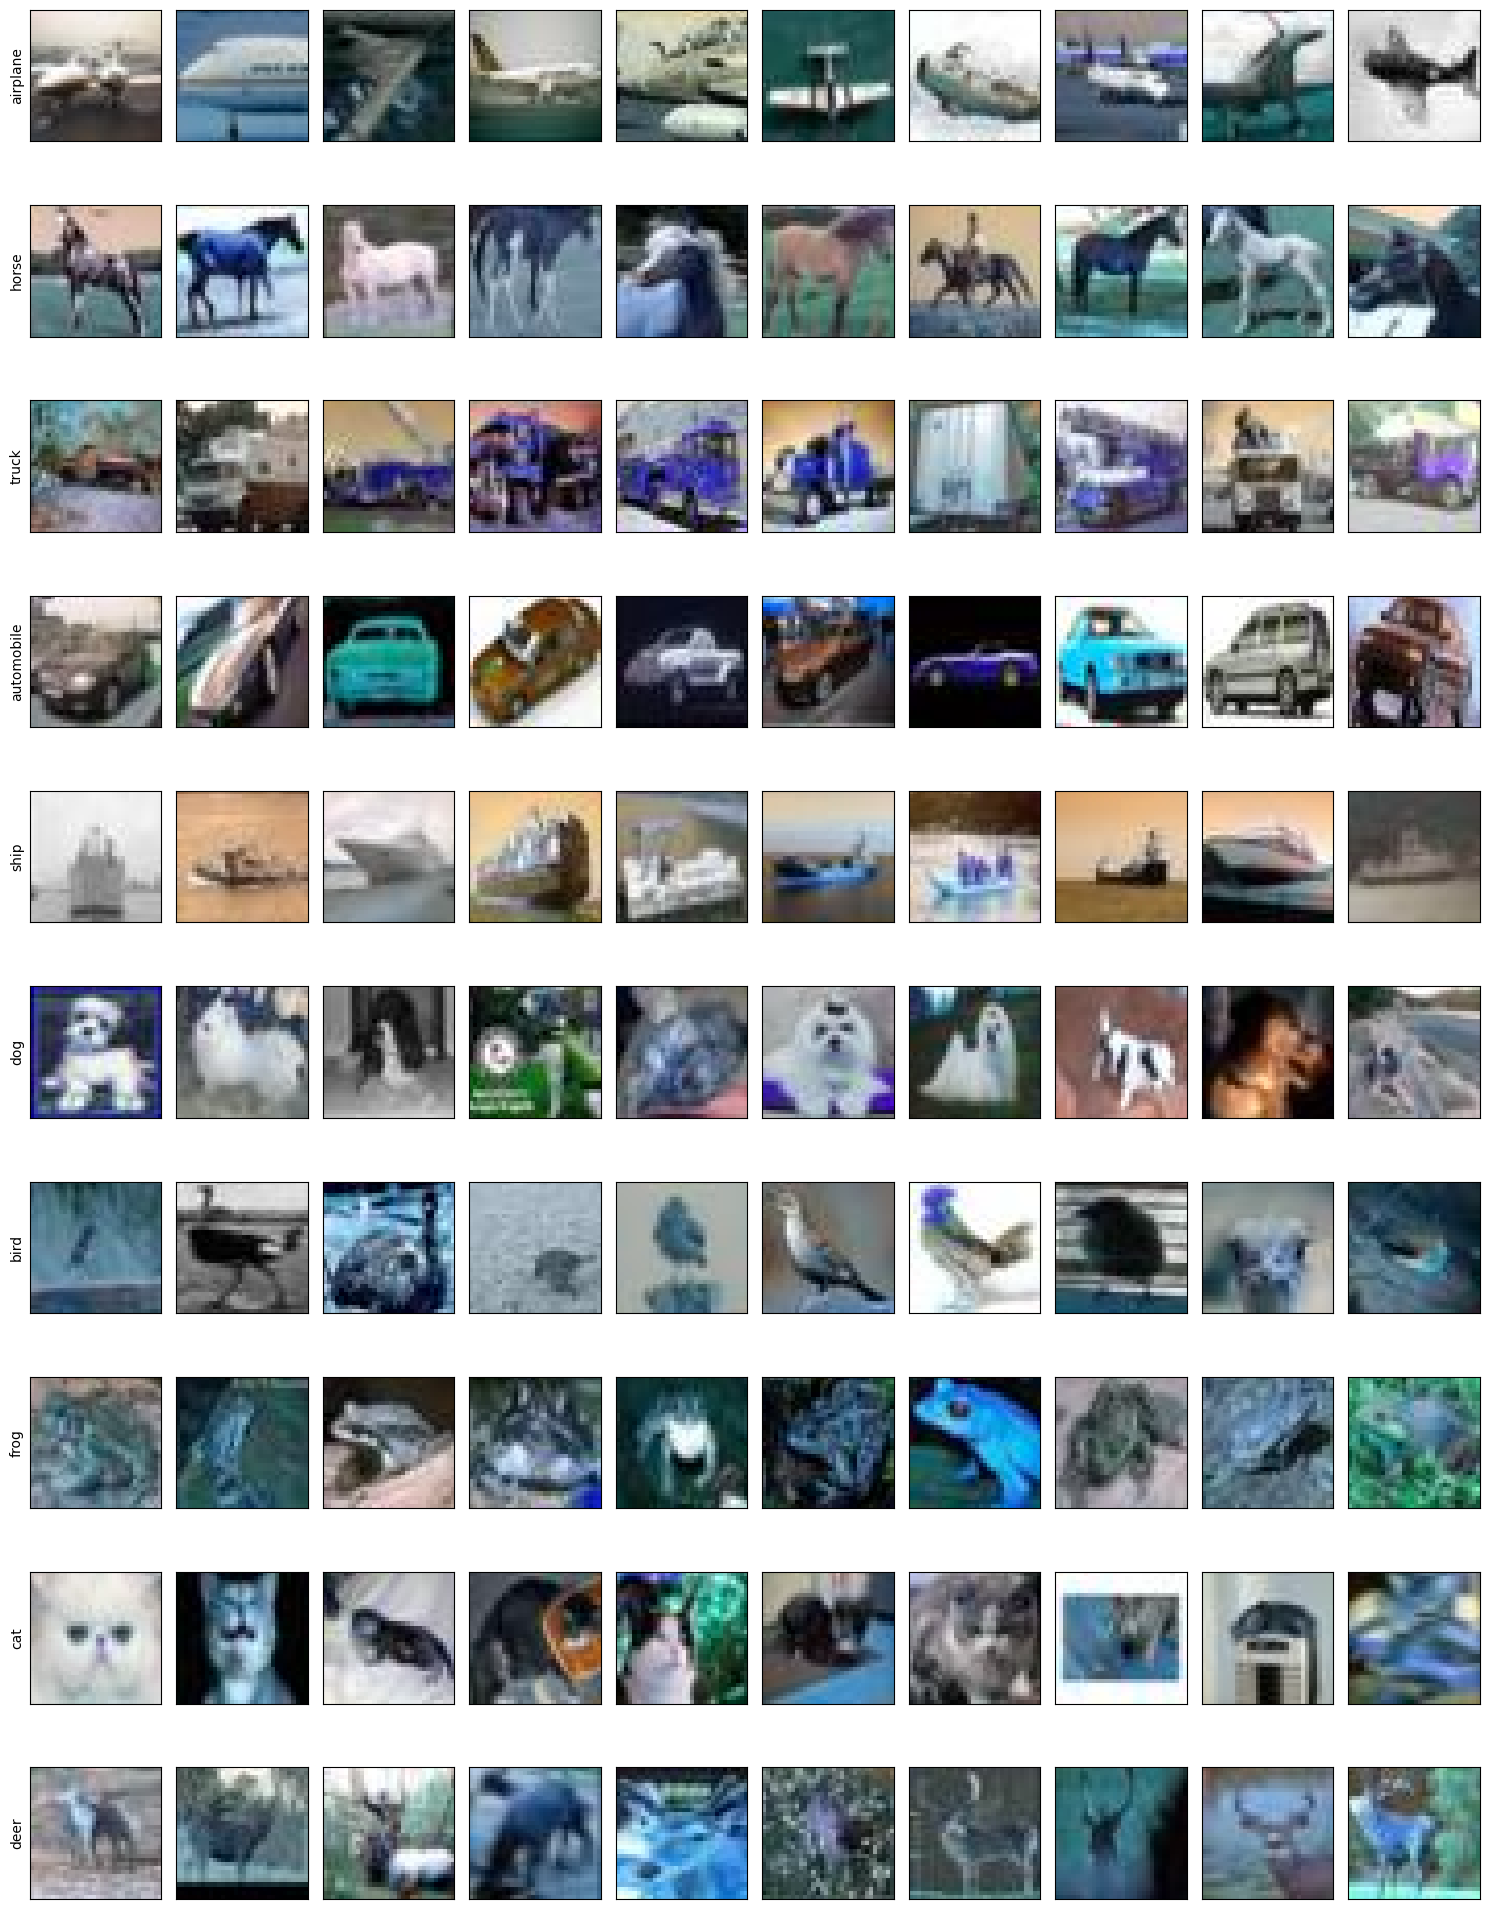

In [4]:
plt.figure(figsize=(15,20))
i = 0
for category in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, category)
    for image_file in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, image_file))
        plt.subplot(10, 10, i+1)
        plt.imshow(image_array)
        if i % 10 == 0:
            plt.ylabel(category)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i % 10 == 0:
            break

plt.tight_layout()
plt.show()


## **Step-4:** Resize the images into 32x32:
Following code snippet reads and resizes the images (32x32) from the training data directory for each category, storing the resized images and their corresponding class labels in the training_data list.

In [5]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c)
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (32, 32))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except WException as e:
            pass

print(len(training_data))

100%|██████████| 5000/5000 [00:18<00:00, 263.54it/s]

50000


This code shuffles the order of elements in the training_data and test_data.

In [6]:
random.shuffle(training_data)

## **Step-5:** Converting the images into Grayscale(32x32x1) and Show as Plot:
This code snippet processes the training_data and test_data list to extract the images and labels, converts them into NumPy arrays, and reshapes(32x32x1) the image array to the appropriate format for further training and processing. Wich will result gray-scaled images.

In [7]:
X_train = []
Y_train = []

for img, label in training_data:
    # Convert the image to grayscale if needed
    if img.ndim == 3 and img.shape[2] == 3:
        img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

    X_train.append(img)
    Y_train.append(label)

X_train = np.array(X_train).astype('float32').reshape(-1, 32, 32, 1)
Y_train = np.array(Y_train)

print(f"X_train shape= {X_train.shape} Y_train= {Y_train.shape}")


X_train shape= (50000, 32, 32, 1) Y_train= (50000,)


This following code will plot and show grayscale images.

### Sample of our grayscale data:

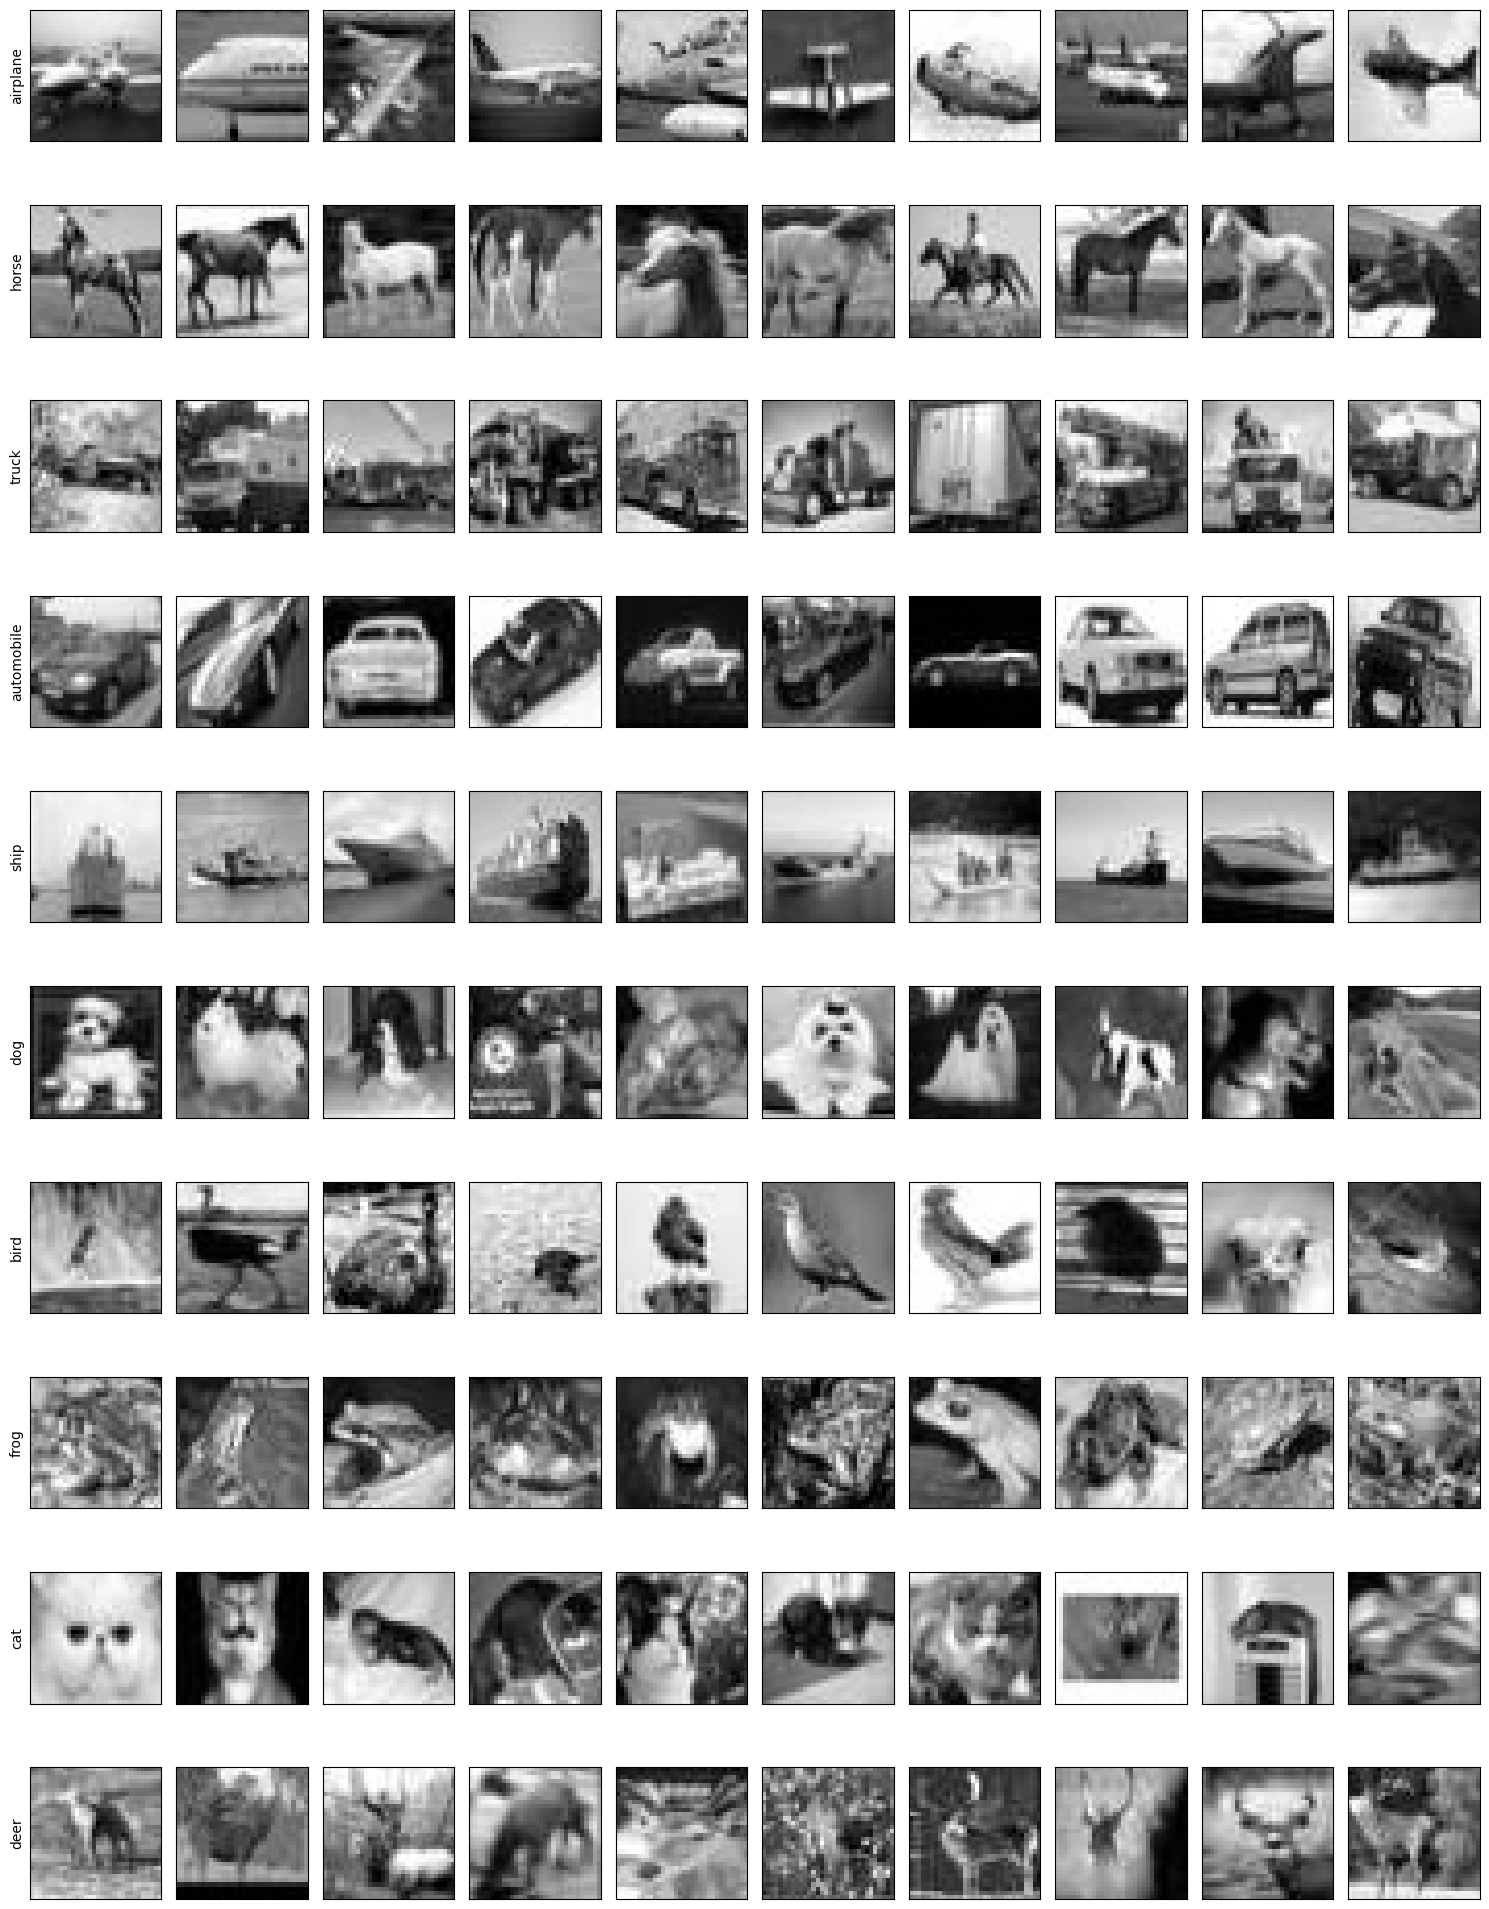

In [8]:

plt.figure(figsize=(15, 20))
i = 0

for category in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, category)
    for image_file in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, image_file))
        gray_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        plt.subplot(10, 10, i + 1)
        plt.imshow(gray_image, cmap='gray')  # Display the grayscaled image
        if i % 10 == 0:
            plt.ylabel(category)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i % 10 == 0:
            break

plt.tight_layout()
plt.show()

## **Model Building and Evaluation:**
We utilized the k-nearest neighbors (k-NN) algorithm for grayscale CIFAR-10 image classification. Two distance metrics, Manhattan (L1) and Euclidean (L2), were employed to measure image similarity. The model's performance was evaluated using 5-fold cross-validation, which divided the training dataset into subsets for robust evaluation. Varying the hyperparameter K, we recorded and averaged the accuracy achieved for each K value. A graph was plotted to visualize the impact of different K values on accuracy for both distance metrics.

This section highlights our model building approach and evaluation using k-NN with 5-fold cross-validation. The subsequent sections of the report will delve into the detailed results and analysis.

## **Step-1:** Importing necessary libraries:

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

## **Step-2:** Flattening the grayscale images:
K-NN algorithm expects a 2-dimensional input, we reshape the training and testing data from:

(50000, 32, 32, 1) --> (50000, 1024)

This flattening process converts the 32x32 images into 1-dimensional arrays, allowing them to be used as input for the k-NN algorithm.

In [11]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))

## **Step-2:** Defining K-value:
Define a range of *K values* to test:

In [12]:
k_values = [1, 3, 5, 7, 9, 11]

Initialize lists to store the average accuracy for each K value:

In [13]:
fold_accuracies_manhattan = []
fold_accuracies_euclidean = []

## **Step-2:** Model training for k-NN Classification:
Perform 5-fold cross-validation for each K value:
In the model building and evaluation process, we perform 5-fold cross-validation to assess the performance of our k-nearest neighbors (k-NN) algorithm. For each fold, we vary the hyperparameter K, which represents the number of nearest neighbors considered for classification. We record the accuracy achieved by the model for each value of K and for both the Manhattan (L1) and Euclidean (L2) distance calculation techniques.

In [14]:
# Perform cross-validation for each K value and fold
for k in k_values:
    # Create k-NN classifiers for Manhattan and Euclidean distances
    classifier_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)  # p=1 for Manhattan distance
    classifier_euclidean = KNeighborsClassifier(n_neighbors=k, p=2)  # p=2 for Euclidean distance

    # Perform cross-validation for Manhattan distance
    accuracies_manhattan = cross_val_score(classifier_manhattan, X_train_flat, Y_train, cv=5)
    fold_accuracies_manhattan.append(accuracies_manhattan)
    print(f"Manhattan Distances, K = {k}:")
    print("Fold Accuracies:", accuracies_manhattan)
    print("Mean Accuracy:", accuracies_manhattan.mean())
    print("")

    # Perform cross-validation for Euclidean distance
    accuracies_euclidean = cross_val_score(classifier_euclidean, X_train_flat, Y_train, cv=5)
    fold_accuracies_euclidean.append(accuracies_euclidean)
    print(f"Euclidean Distances, K = {k}:")
    print("Fold Accuracies:", accuracies_euclidean)
    print("Mean Accuracy:", accuracies_euclidean.mean())
    print("")


Manhattan Distances, K = 1:
Fold Accuracies: [0.3239 0.3208 0.3244 0.3196 0.3245]
Mean Accuracy: 0.32264

Euclidean Distances, K = 1:
Fold Accuracies: [0.2998 0.3025 0.3026 0.3071 0.2984]
Mean Accuracy: 0.30208

Manhattan Distances, K = 3:
Fold Accuracies: [0.3126 0.3179 0.3163 0.3151 0.3187]
Mean Accuracy: 0.31612

Euclidean Distances, K = 3:
Fold Accuracies: [0.2948 0.2982 0.299  0.2943 0.2991]
Mean Accuracy: 0.29707999999999996

Manhattan Distances, K = 5:
Fold Accuracies: [0.32   0.3233 0.3233 0.3224 0.3268]
Mean Accuracy: 0.32316

Euclidean Distances, K = 5:
Fold Accuracies: [0.3002 0.3046 0.3026 0.3003 0.2995]
Mean Accuracy: 0.30144000000000004

Manhattan Distances, K = 7:
Fold Accuracies: [0.3234 0.3274 0.3241 0.3256 0.3263]
Mean Accuracy: 0.32536

Euclidean Distances, K = 7:
Fold Accuracies: [0.3015 0.3048 0.3009 0.3043 0.3038]
Mean Accuracy: 0.30306

Manhattan Distances, K = 9:
Fold Accuracies: [0.3218 0.3305 0.323  0.3273 0.3233]
Mean Accuracy: 0.32517999999999997

Euclidean 

## **Step 3:** Plotting the accuracy results of Manhattan(L1) and Euclidean(L2) distance
To visualize the impact of different values of K on the model's accuracy, we plot a graph. The X-axis represents the K values. The Y-axis represents the corresponding accuracy values. We create separate graph for both the Manhattan (L1) and Euclidean (L2) distances, allowing us to compare their performances.

### **Fig-1:** Accuracy vs. Fold for Manhattan and Euclidean Distances

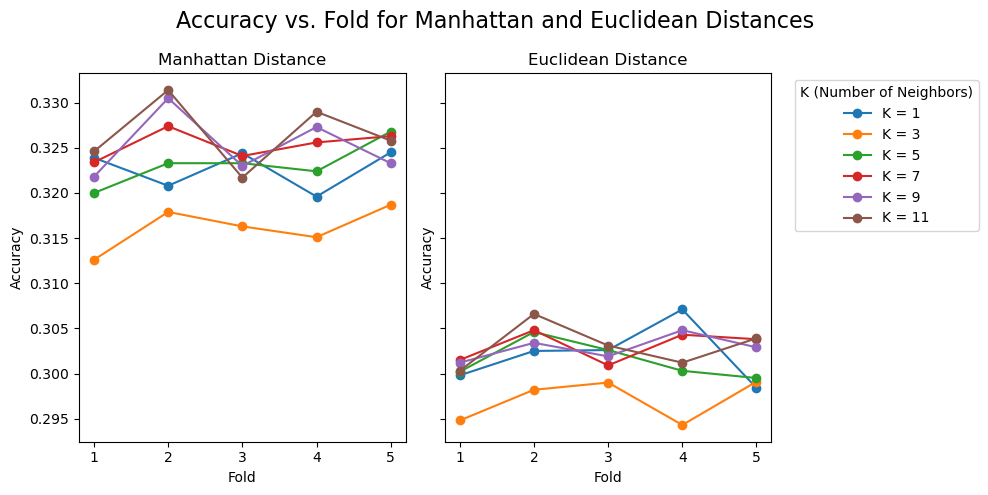

In [15]:
# Plotting the graph
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

for i, k in enumerate(k_values):
    axs[0].plot(range(1, 6), fold_accuracies_manhattan[i], marker='o', label=f"K = {k}")
    axs[1].plot(range(1, 6), fold_accuracies_euclidean[i], marker='o', label=f"K = {k}")

axs[0].set_title("Manhattan Distance")
axs[1].set_title("Euclidean Distance")

axs[0].set_xlabel("Fold")
axs[0].set_ylabel("Accuracy")
axs[1].set_xlabel("Fold")
axs[1].set_ylabel("Accuracy")

plt.suptitle('Accuracy vs. Fold for Manhattan and Euclidean Distances', fontsize=16)
plt.legend(title="K (Number of Neighbors)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Fig-2:** Accuracy vs. K-value for Manhattan and Euclidean Distances
In this graph we visualizze, where X-axis represents the K values. The Y-axis represents the corresponding accuracy values. We also show accuracy for each fold and make a live using mean accuracy for each k.

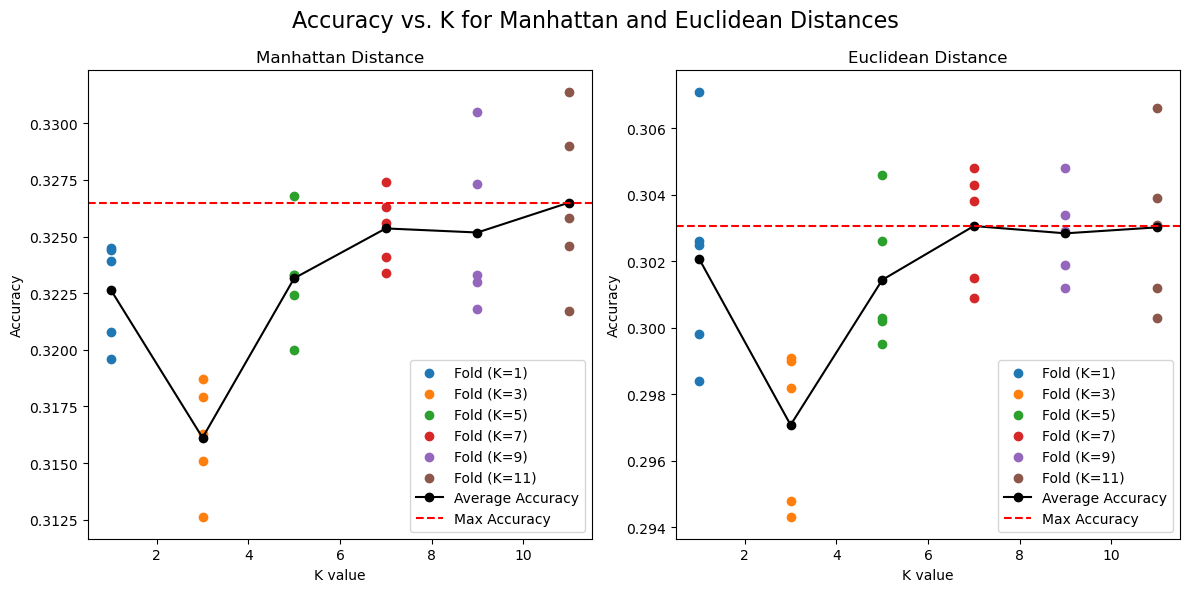

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the graph for Manhattan distance
axs[0].set_title("Manhattan Distance")
axs[0].set_xlabel("K value")
axs[0].set_ylabel("Accuracy")

for i, k in enumerate(k_values):
    x = [k] * 5  # Repeat k value 5 times
    y = fold_accuracies_manhattan[i]  # Accuracy values for Manhattan distance
    axs[0].scatter(x, y, marker='o', label=f"Fold (K={k})")

mean_accuracies_manhattan = np.mean(fold_accuracies_manhattan, axis=1)
max_accuracy_manhattan = np.max(mean_accuracies_manhattan)
max_k_manhattan = k_values[np.argmax(mean_accuracies_manhattan)]
axs[0].plot(k_values, mean_accuracies_manhattan, marker='o', linestyle='-', color='black', label="Average Accuracy")
axs[0].axhline(max_accuracy_manhattan, color='red', linestyle='--', label="Max Accuracy")
axs[0].legend()

# Plotting the graph for Euclidean distance
axs[1].set_title("Euclidean Distance")
axs[1].set_xlabel("K value")
axs[1].set_ylabel("Accuracy")

for i, k in enumerate(k_values):
    x = [k] * 5  # Repeat k value 5 times
    y = fold_accuracies_euclidean[i]  # Accuracy values for Euclidean distance
    axs[1].scatter(x, y, marker='o', label=f"Fold (K={k})")

mean_accuracies_euclidean = np.mean(fold_accuracies_euclidean, axis=1)
max_accuracy_euclidean = np.max(mean_accuracies_euclidean)
max_k_euclidean = k_values[np.argmax(mean_accuracies_euclidean)]
axs[1].plot(k_values, mean_accuracies_euclidean, marker='o', linestyle='-', color='black', label="Average Accuracy")
axs[1].axhline(max_accuracy_euclidean, color='red', linestyle='--', label="Max Accuracy")
axs[1].legend()

fig.suptitle('Accuracy vs. K for Manhattan and Euclidean Distances', fontsize=16)
plt.tight_layout()
plt.show()


By examining the graph, we can observe how the accuracy changes as we vary the value of K for each distance calculation technique. 


## **Step-4:** Top 5 predection on test image: 

Presenting the elegant showcase of the top 5 image predictions by L1 and L2 distance. Each prediction includes the model's class name and its calculated distance. 

**Note: One prediction will always have a distance of zero due to the shared training data.**


Top 5 Predictions for L1 Distance:
Prediction 1: Class 'truck' with L1 distance 0.00
Prediction 2: Class 'bird' with L1 distance 849.33
Prediction 3: Class 'cat' with L1 distance 861.33
Prediction 4: Class 'airplane' with L1 distance 884.56
Prediction 5: Class 'bird' with L1 distance 911.18

Top 5 Predictions for L2 Distance:
Prediction 1: Class 'truck' with L2 distance 0.00
Prediction 2: Class 'truck' with L2 distance 283.34
Prediction 3: Class 'ship' with L2 distance 303.51
Prediction 4: Class 'ship' with L2 distance 305.86
Prediction 5: Class 'ship' with L2 distance 306.19


	Some Predicted Images by the k-NN model	:


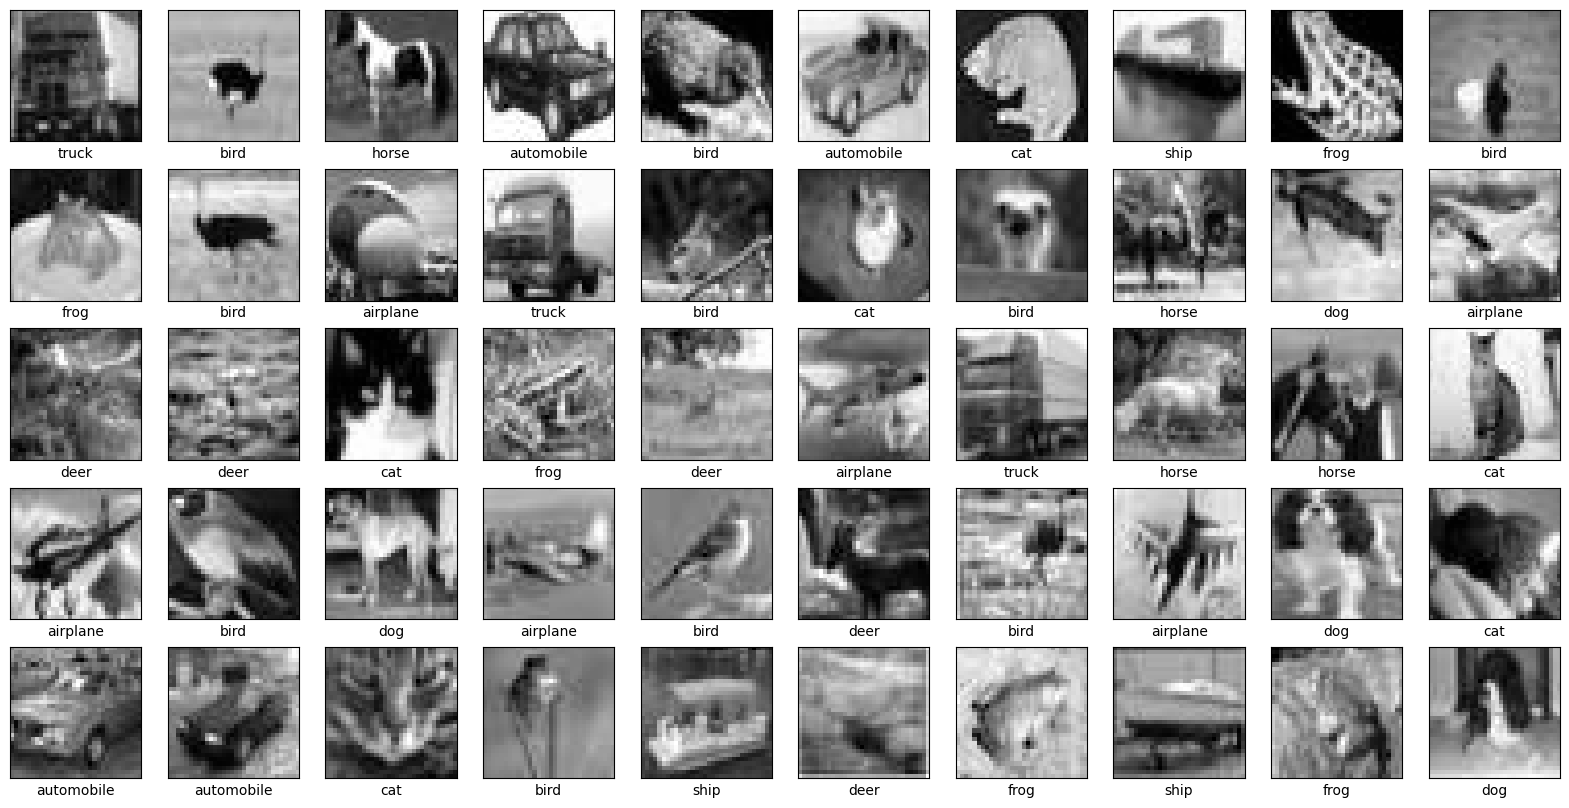

In [17]:
def l1_dist(image1, image2):
    return np.sum(np.abs(image1 - image2))

def l2_dist(image1, image2):
    return np.sqrt(np.sum((image1 - image2) ** 2))


random.shuffle(training_data)
plt.figure(figsize=(20, 10))

for i in range(50):
    plt.subplot(5, 10, i+1)
    image = training_data[i][0]
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale
    plt.imshow(image_gray, cmap="gray")
    plt.xlabel(CATEGORIES[training_data[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i == 49:
        break

test_images = []

for i in range(2000):
    test_image = training_data[i][0]
    test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    test_images.append(test_image_gray)

print("Top 5 Predictions for L1 Distance:")
for test_image_gray in test_images:
    distances1 = []
    for train_image, class_num in training_data:
        train_image_gray = cv2.cvtColor(train_image, cv2.COLOR_BGR2GRAY)
        dist1 = l1_dist(test_image_gray, train_image_gray)
        distances1.append((dist1, class_num))
    
    distances1.sort(key=lambda x: x[0])
    
    for i, (dist1, class_num) in enumerate(distances1[:5]):
        predicted_class = CATEGORIES[class_num]
        print(f"Prediction {i+1}: Class '{predicted_class}' with L1 distance {dist1/100:.2f}")
    break

print("\nTop 5 Predictions for L2 Distance:")
for test_image_gray in test_images:
    distances2 = []
    for train_image, class_num in training_data:
        train_image_gray = cv2.cvtColor(train_image, cv2.COLOR_BGR2GRAY)
        dist2 = l2_dist(test_image_gray, train_image_gray)
        distances2.append((dist2, class_num))
    
    distances2.sort(key=lambda x: x[0])
    
    for i, (dist2, class_num) in enumerate(distances2[:5]):
        predicted_class = CATEGORIES[class_num]
        print(f"Prediction {i+1}: Class '{predicted_class}' with L2 distance {dist2:.2f}")
    
    print("\n\n\tSome Predicted Images by the k-NN model\t:")
    plt.show()
    break


## **Discussion:**
In this assignment, we employed the k-nearest neighbors (k-NN) algorithm to classify gray-scale CIFAR-10 images. We used two distance metrics, Manhattan (L1) and Euclidean (L2), to measure the similarity between images. To evaluate the performance of our models, we conducted 5-fold cross-validation and computed the average accuracy for different values of K. We use gray-scale dataset because grayscale helps reduce computational complexity and can improve efficiency in image classification tasks.

The dataset's characteristics, including the nature of features and class complexity, influenced the evaluation of distance metrics. L1 distance measures the sum of absolute differences between corresponding elements, while L2 distance calculates the square root of the sum of squared differences.

Based on our results, we observed that both Manhattan achieved reasonably high accuracies for K = 11, and Euclidean distances achieved reasonably high accuracies for K = 7.

For Manhattan (k=11), mean accuracy = 32.70%

For Euclidean (k=7), mean accuracy = 30.30%

In this assignment, it can be seen, K  played a crucial role in the model's accuracy. We experimented with different values of K and found that an optimal value of K, such as K=11 for Manhattan and k=7 for Euclidean in our case, resulted in improved accuracy. 

In general, the Manhattan distance (L1) metric tended to perform slightly better than the Euclidean distance metric. This suggests that the Euclidean distance may capture the underlying structure of the gray-scale dataset more effectively.

Limitations and potential improvements include focusing solely on distance metrics without considering feature selection, dimensionality reduction, or advanced classification algorithms. Exploring these areas could further enhance classification accuracy.

In conclusion, our analysis and comparison of Manhattan (L1) and Euclidean (L2) distances revealed that the Manhattan distance metric performed slightly better in classifying gray-scale CIFAR-10 images. 